## Email Spam Detection with Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# Checking for duplicate values

df.duplicated().sum()

403

In [7]:
# Dropping Duplicated values

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Maximum values from last three columns are null. So, we will drop these columns from our dataset.

In [8]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Updating column names

df.columns = ['Category', 'Message']
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5169, 2)

In [11]:
df['Category'].value_counts()

ham     4516
spam     653
Name: Category, dtype: int64

### There are 4516 ham emails whereas 653 spam mails in total.

In [12]:
# No. of unique messages

df['Message'].nunique()

5169

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [14]:
# Coverting to numerical labels

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Category'] = lb.fit_transform(df['Category'])

## Exploratory Data Analysis

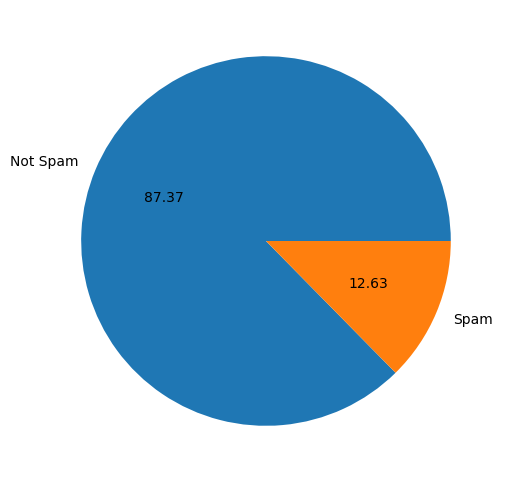

In [15]:
plt.figure(figsize = (12,6))
plt.pie(df['Category'].value_counts(), labels=['Not Spam','Spam'], autopct='%0.2f')
plt.show()

### Almost 13% of emails are spam.

In [16]:
# Getting the number of words in each mail into a new column

df['word_len'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Category,Message,word_len
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [17]:
# Getting the number of sentences in each mail into a new column

df['sent_len'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,word_len,sent_len
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [18]:
print("Statistical Overview: \n\n{}".format(df.describe()))

Statistical Overview: 

          Category     word_len     sent_len
count  5169.000000  5169.000000  5169.000000
mean      0.126330    18.453279     1.947185
std       0.332253    13.324793     1.362406
min       0.000000     1.000000     1.000000
25%       0.000000     9.000000     1.000000
50%       0.000000    15.000000     1.000000
75%       0.000000    26.000000     2.000000
max       1.000000   220.000000    28.000000


In [19]:
# Description of data for messages that are not spam

df[df['Category'] == 0 ][['word_len','sent_len']].describe()

,word_len,sent_len
count,4516.000000,4516.000000
mean,17.120903,1.799601
std,13.493725,1.278465
min,1.000000,1.000000
25%,8.000000,1.000000
50%,13.000000,1.000000
75%,22.000000,2.000000
max,220.000000,28.000000


In [20]:
# Description of data for messages that are spam

df[df['Category'] == 1 ][['word_len','sent_len']].describe()

,word_len,sent_len
count,653.000000,653.000000
mean,27.667688,2.967841
std,7.008418,1.483201
min,2.000000,1.000000
25%,25.000000,2.000000
50%,29.000000,3.000000
75%,32.000000,4.000000
max,46.000000,8.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x600 with 0 Axes>

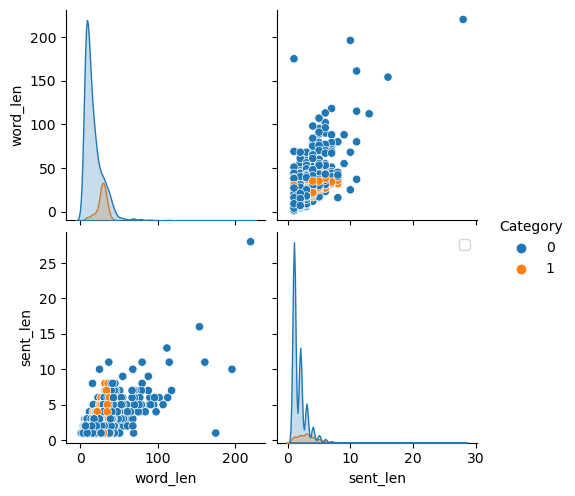

In [21]:
plt.figure(figsize=(12,6))
sns.pairplot(df, hue ='Category')
plt.legend() 
plt.show()

### With 0 indicating non-spam emails and 1 denoting spam mails, it can be seen from the above graphs that this data consists of outliers.

<AxesSubplot:xlabel='sent_len', ylabel='word_len'>

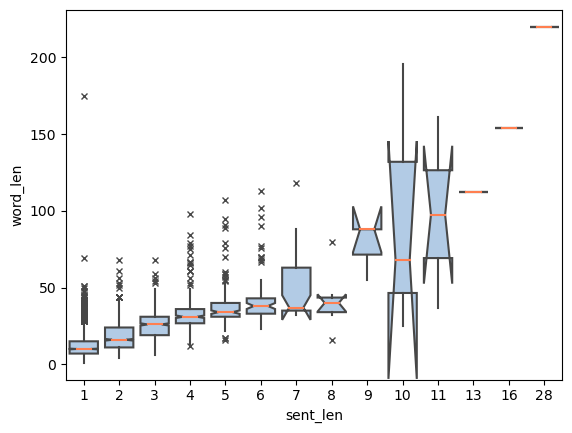

In [22]:
sns.boxplot(
    data=df, x="sent_len", y="word_len",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

<AxesSubplot:xlabel='sent_len', ylabel='word_len'>

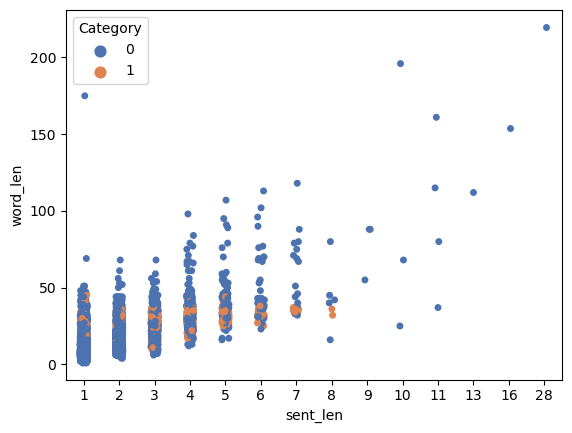

In [23]:
sns.stripplot(data=df, x="sent_len", y="word_len", hue="Category", palette="deep")

<AxesSubplot:xlabel='Category', ylabel='sent_len'>

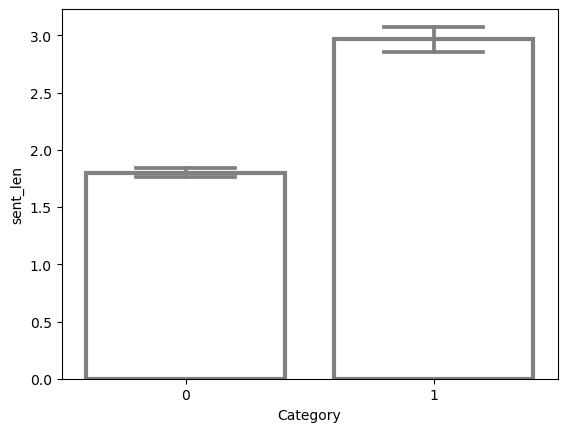

In [24]:
sns.barplot(
    data=df, x="Category", y="sent_len",
    capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

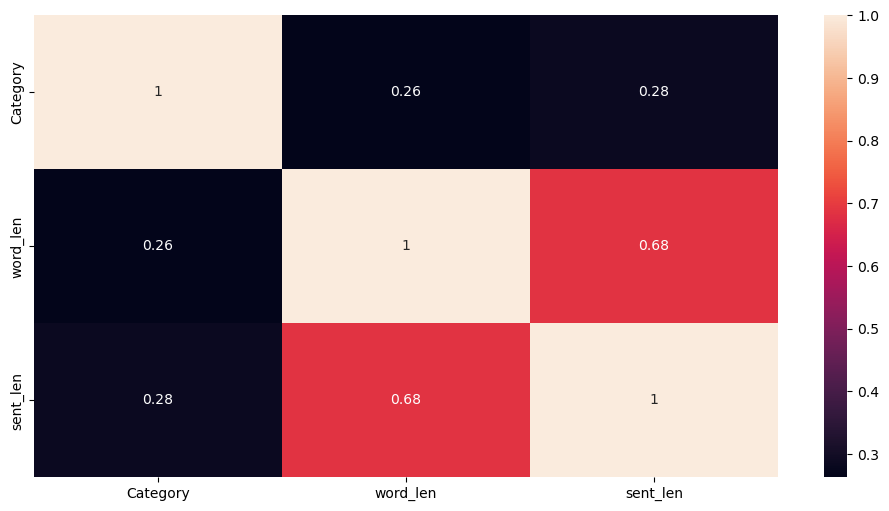

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(),annot= True)
plt.show()

## Text Preprocessing

### Steps:

#### 1. Punctuation Removal
#### 2. Conversion to lower case
#### 3. Word tokenization
#### 4. Stop Words Removal
#### 5. Stemming or Lemmatization

In [26]:
df1 = df.copy()
df.head()

,Category,Message,word_len,sent_len
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [27]:
df1 = df1.drop(columns = ['word_len', 'sent_len'])
df1.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
sw = stopwords.words('English')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
lm = WordNetLemmatizer()

In [30]:
msg = []
for i in df['Message']:
    t = re.sub('[^A-Za-z0-9]',' ',i)      # Removal of punctuations 
    t = t.lower()                         # Conversion to lower case
    t = word_tokenize(t)                  # Word_tokenization  - list of words
    t = [i for i in t if i not in sw]     # Stop Words Removal
    t = [lm.lemmatize(i) for i in t]      # Lemmatization - list of words
    t = " ".join(t)                       # Joining to form a sentence
    msg.append(t)
print(msg)

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18', 'u dun say early hor u c already say', 'nah think go usf life around though', 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send 1 50 rcv', 'even brother like speak treat like aid patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune', 'winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour', 'mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030', 'gon na home soon want talk stuff anymore tonight k cried enough today', 'six chance win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6days 16 tsandcs apply reply hl 4 info

In [31]:
# Conversion to Tokens & storing theem in a Sparse Matrix

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
sm = cv.fit_transform(msg).toarray()  
print(len(cv.get_feature_names()))
print(sm.shape)

1500
(5169, 1500)


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
# Limitting the number of words in a message to 1500 words

print(len(sm[0]))
print(len(sm[2342]))
print(len(sm[1987]))
print(len(sm[876]))
print(len(sm[428]))

1500
1500
1500
1500
1500


In [33]:
# Capturing Target variable

x = sm              
y = df['Category']  
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [34]:
# Splitting Data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3876, 1500)
(1293, 1500)
(3876,)
(1293,)


In [35]:
# Multinomial Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(x_train, y_train)
print("Training Accuracy: ", mb.score(x_train, y_train))
print("Testing Accuracy: ", mb.score(x_test, y_test))

Training Accuracy:  0.9865841073271414
Testing Accuracy:  0.9760247486465584


In [36]:
# Classification

ypred_mb = mb.predict(x_test)
print(ypred_mb)

[1 0 0 ... 0 0 0]


In [37]:
# Confusion Matrix & Classification Report

from sklearn.metrics import confusion_matrix,classification_report
cm_mb = confusion_matrix(y_test,ypred_mb)
print(cm_mb)
print(classification_report(y_test,ypred_mb))

[[1116   23]
 [   8  146]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1139
           1       0.86      0.95      0.90       154

    accuracy                           0.98      1293
   macro avg       0.93      0.96      0.95      1293
weighted avg       0.98      0.98      0.98      1293



In [38]:
# Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train, y_train)
print("Training Accuracy: ", gb.score(x_train, y_train))
print("Testing Accuracy: ", gb.score(x_test, y_test))

Training Accuracy:  0.8524251805985552
Testing Accuracy:  0.8337200309358082


In [39]:
# Classification

ypred_gb = gb.predict(x_test)
print(ypred_gb)

[1 1 0 ... 0 0 0]


In [40]:
# Confusion Matrix & Classification Report

cm_gb = confusion_matrix(y_test,ypred_gb)
print(cm_gb)
print(classification_report(y_test,ypred_gb))

[[934 205]
 [ 10 144]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1139
           1       0.41      0.94      0.57       154

    accuracy                           0.83      1293
   macro avg       0.70      0.88      0.73      1293
weighted avg       0.92      0.83      0.86      1293



In [41]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("Training Accuracy: ", rf.score(x_train, y_train))
print("Testing Accuracy: ", rf.score(x_test, y_test))

Training Accuracy:  0.999484004127967
Testing Accuracy:  0.9822119102861562


In [42]:
# Classification

ypred_rf = rf.predict(x_test)
print(ypred_rf)

[1 0 0 ... 0 0 0]


In [43]:
# Confusion Matrix & Classification Report

cm_rf = confusion_matrix(y_test,ypred_rf)
print(cm_rf)
print(classification_report(y_test,ypred_rf))

[[1134    5]
 [  18  136]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1139
           1       0.96      0.88      0.92       154

    accuracy                           0.98      1293
   macro avg       0.97      0.94      0.96      1293
weighted avg       0.98      0.98      0.98      1293



In [44]:
from sklearn.ensemble import VotingClassifier
evc = VotingClassifier(estimators=[('m1', mb), ('m2', gb), ('m3', rf)], voting='hard')
evc.fit(x_train, y_train)
final_pred = print('Testing score', evc.score(x_test, y_test))

Testing score 0.9783449342614076


In [45]:
# Final predictions

predictions = evc.predict(x_test)
print(predictions[:500])

[1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 